In [2]:
import prep
import prsa
import os

In [3]:
data_path = 'data/normokapnia'
files_n = []
for filename in os.listdir(data_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(data_path, filename)  
        df = prep.read_data(file_path, 'abp_finger[mm_Hg]')
        files_n.append(df)
        prep.describe_file(df, filename)
        print('')

prep.files_time_analysis(files_n)

File name: Ochotnik01_baseline.csv
File size: 59456
Total measurement time: 4:57 min
Percent of missing data: 0.47%

File name: Ochotnik02_baseline.csv
File size: 52727
Total measurement time: 4:23 min
Percent of missing data: 0.73%

File name: Ochotnik03_baseline.csv
File size: 59401
Total measurement time: 4:57 min
Percent of missing data: 0.65%

File name: Ochotnik04_baseline.csv
File size: 59841
Total measurement time: 4:59 min
Percent of missing data: 0.32%

File name: Ochotnik05_baseline.csv
File size: 60541
Total measurement time: 5:02 min
Percent of missing data: 0.43%

File name: Ochotnik06_baseline.csv
File size: 60692
Total measurement time: 5:03 min
Percent of missing data: 0.83%

File name: Ochotnik07_baseline.csv
File size: 60334
Total measurement time: 5:01 min
Percent of missing data: 0.31%

File name: Ochotnik08_baseline.csv
File size: 56974
Total measurement time: 4:44 min
Percent of missing data: 0.68%

File name: Ochotnik09_baseline.csv
File size: 56898
Total measur

In [4]:
data_path = 'data/hiperkapnia'
files_h = []
for filename in os.listdir(data_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(data_path, filename)
        files_h.append(df)
        df = prep.read_data(file_path, 'abp_finger[mm_Hg]')
        prep.describe_file(df, filename)
        print('')
        
prep.files_time_analysis(files_h)

File name: Ochotnik01_hiperkapnia.csv
File size: 142101
Total measurement time: 11:50 min
Percent of missing data: 27.31%

File name: Ochotnik02_hiperkapnia.csv
File size: 60661
Total measurement time: 5:03 min
Percent of missing data: 0.63%

File name: Ochotnik03_hiperkapnia.csv
File size: 35182
Total measurement time: 2:55 min
Percent of missing data: 0.82%

File name: Ochotnik04_hiperkapnia.csv
File size: 48446
Total measurement time: 4:02 min
Percent of missing data: 0.59%

File name: Ochotnik05_hiperkapnia.csv
File size: 45076
Total measurement time: 3:45 min
Percent of missing data: 0.41%

File name: Ochotnik06_hiperkapnia.csv
File size: 61983
Total measurement time: 5:09 min
Percent of missing data: 0.49%

File name: Ochotnik07_hiperkapnia.csv
File size: 62135
Total measurement time: 5:10 min
Percent of missing data: 0.46%

File name: Ochotnik08_hiperkapnia.csv
File size: 59211
Total measurement time: 4:56 min
Percent of missing data: 0.77%

File name: Ochotnik09_hiperkapnia.csv

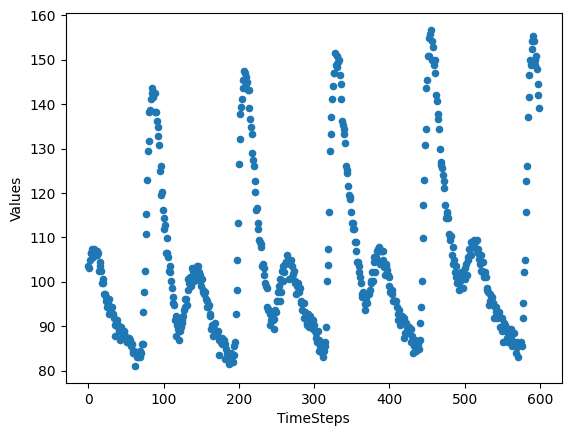

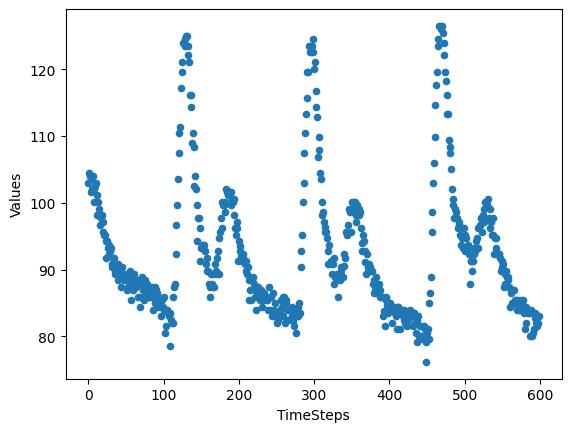

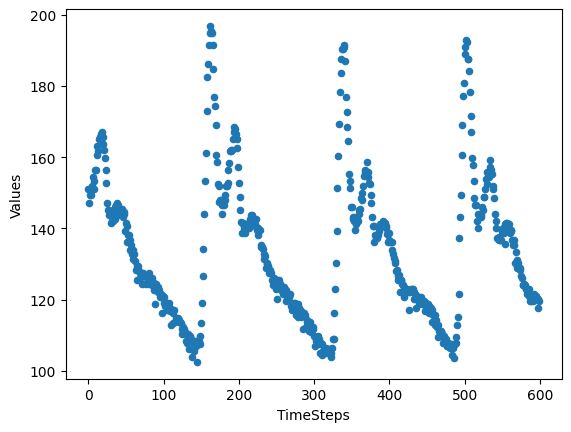

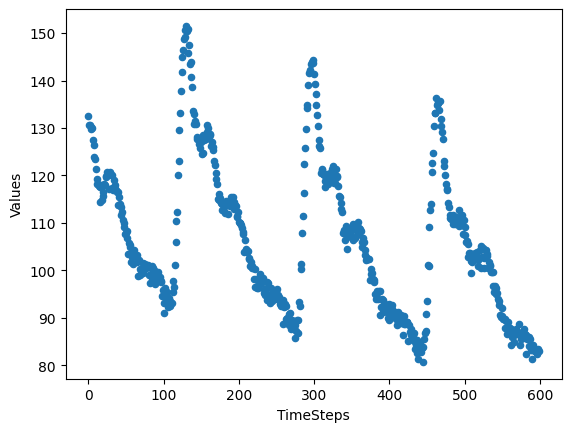

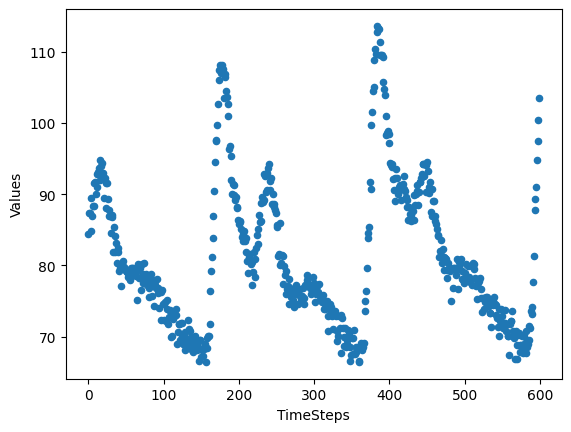

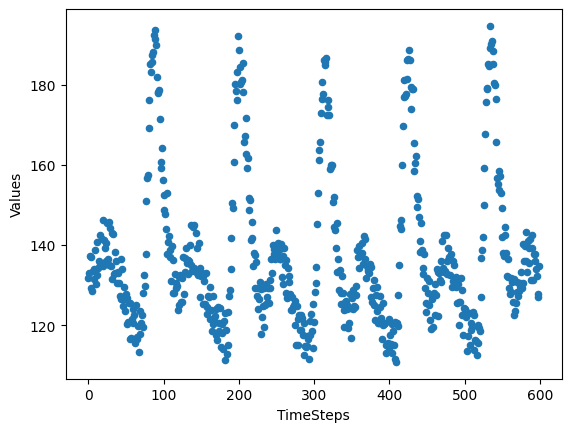

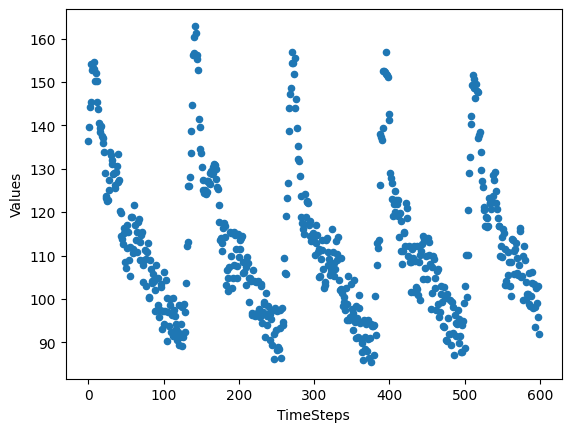

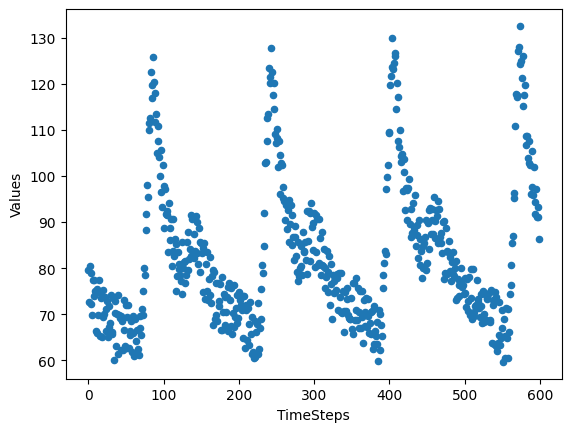

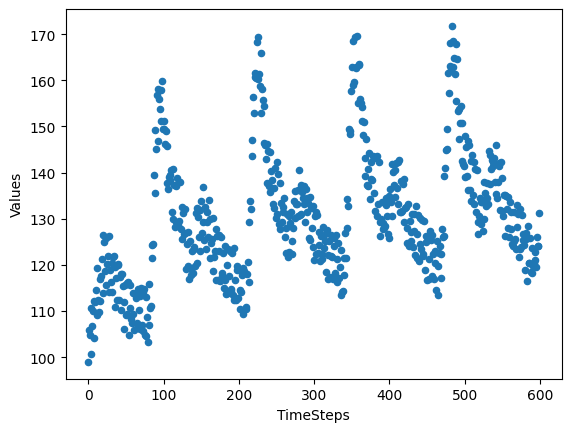

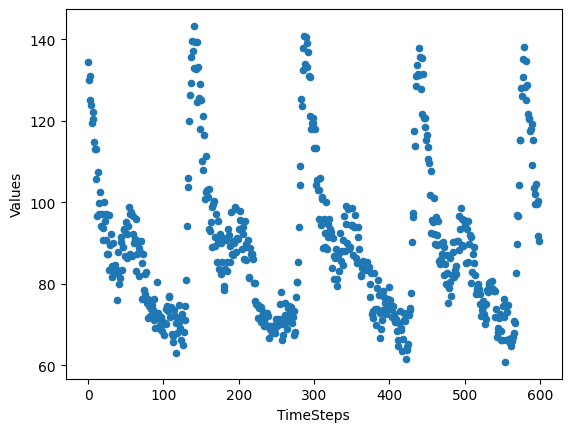

In [9]:
for i in range(10):
    files_n[i].interpolate(method='linear', inplace=True)
    # take first 600 points
    file = files_n[i].iloc[:600, :]
    # scatter plot that file
    file.plot.scatter(x='TimeSteps', y='Values')

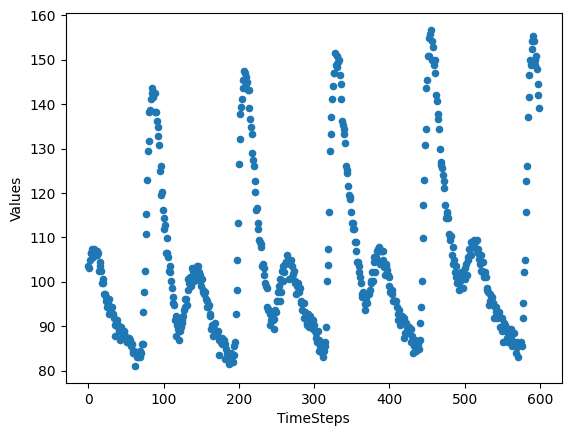

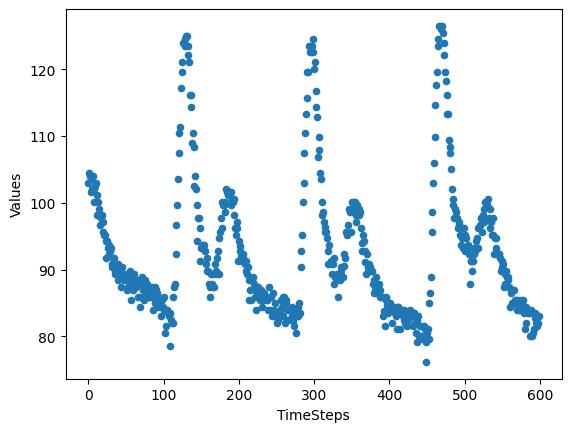

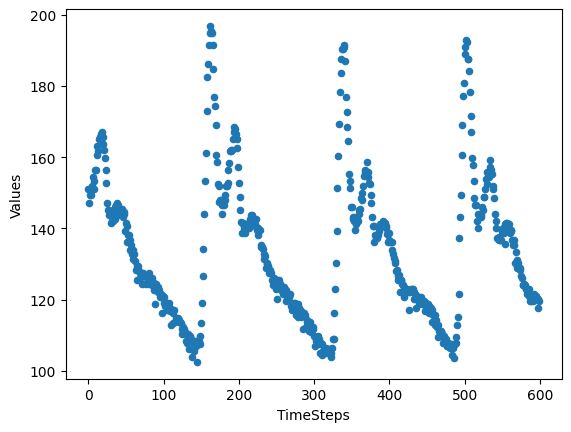

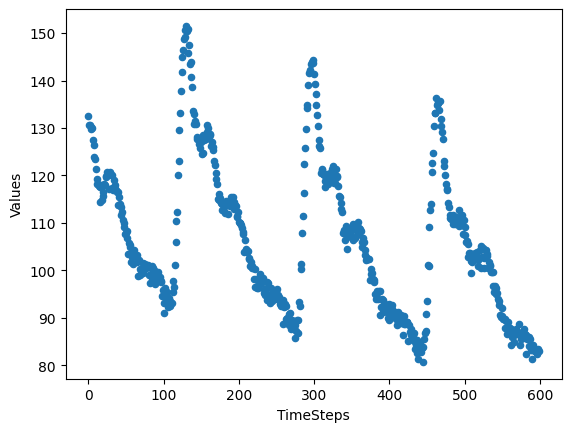

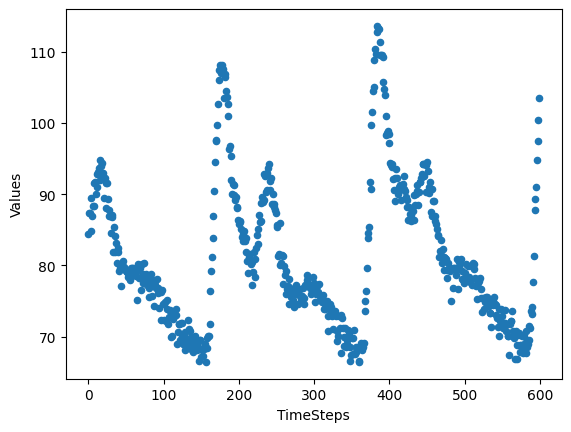

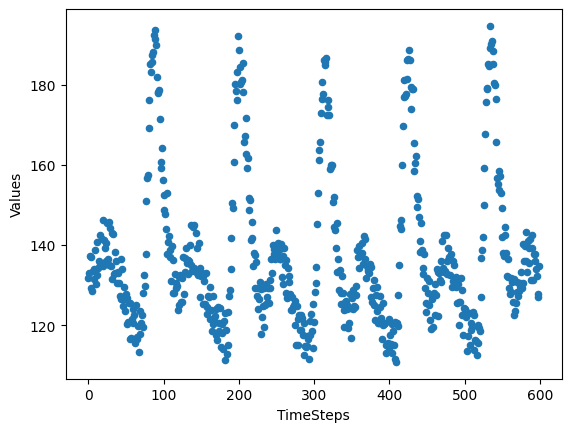

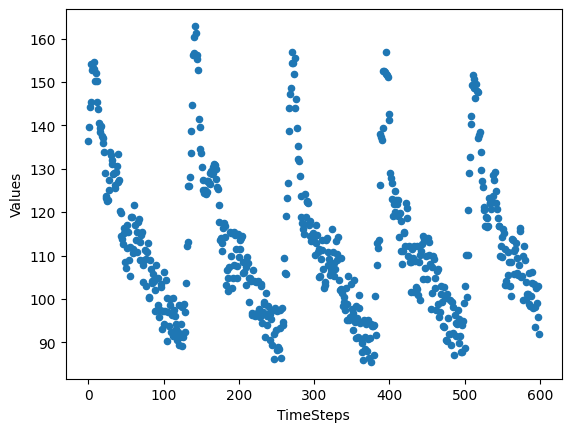

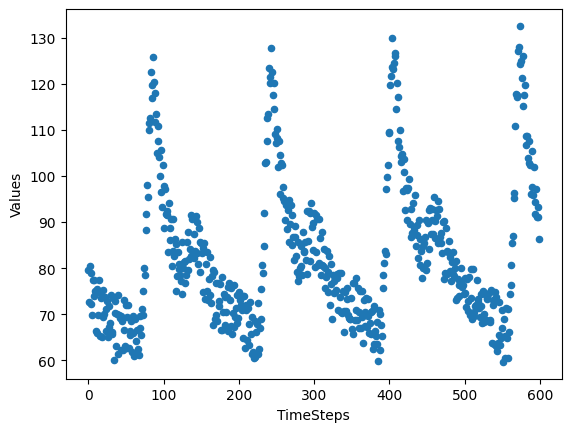

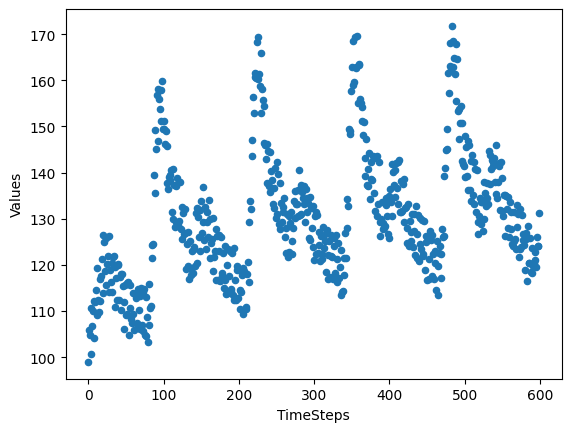

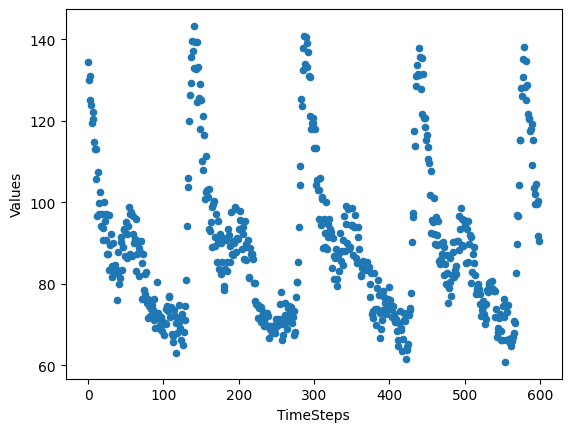

In [10]:
for i in range(10):
    files_h[i].interpolate(method='linear', inplace=True)
    # take first 600 points
    file = files_n[i].iloc[:600, :]
    # scatter plot that file
    file.plot.scatter(x='TimeSteps', y='Values')

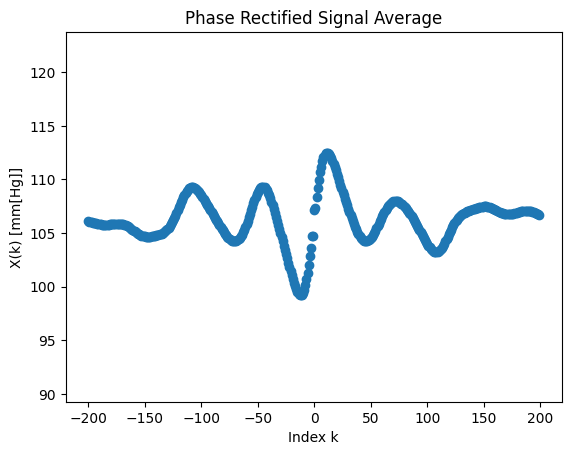

In [6]:
prsa_result = prsa.calculate(files_n[0]['Values'], 200, 'AC')
prsa.plot(prsa_result)

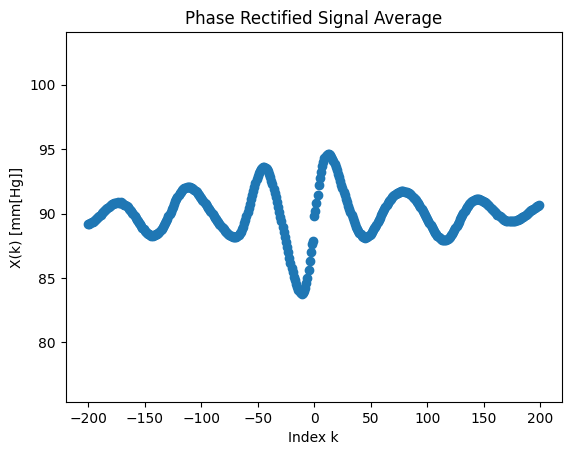

In [7]:
prsa_result = prsa.calculate(files_h[0]['Values'], 200, 'AC')
prsa.plot(prsa_result)

In [14]:
import numpy as np
import scipy.signal as signal

data = np.array([1, 3, 7, 1, 2, 6, 3, 4, 1])
peaks, _ = signal.find_peaks(data)
print(peaks)

[2 5 7]
